# Netflix Exploratory Data Analysis
---

## 1. Introduction

This project was developed as a **personal learning exercise** to strengthen my skills in **data analysis**, with a particular focus on **Exploratory Data Analysis (EDA)**. The goal is twofold:  
1. To practice the process of **cleaning, exploring, and visualizing real-world data**.  
2. To extract **meaningful insights** about the structure and trends of Netflix content.  

The dataset used in this analysis comes from [Kaggle’s *Netflix Movies and TV Shows* dataset](https://www.kaggle.com/datasets/shivamb/netflix-shows), which contains information such as titles, release years, countries, genres, ratings, and durations. This rich dataset provides an excellent opportunity to explore patterns in Netflix’s catalog and to demonstrate the application of various Python tools for data analysis.


### 1.1. Before starting

Before diving into the dataset, it is essential to import the core Python libraries that will support the analysis. These libraries provide the necessary tools for data manipulation, numerical computations, and visualization, forming the foundation of most modern data analysis workflows.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns


After setting up the environment, the next step is to **load the dataset** into a Pandas DataFrame. This will allow us to efficiently manipulate, clean, and explore the data throughout the analysis.

The dataset is stored in the local `./dataset` folder as a CSV file. We begin by reading it into a DataFrame and inspecting its basic structure to better understand its contents.

In [2]:
df = pd.read_csv('./dataset/netflix_titles.csv')
print(df.shape)

(8807, 12)


We can confirm that the data is correctly imported. Now it is time to start doing the data Analysis

---
##

## 2. Data Preparation

### 2.1. Data Overview

Before performing any cleaning or detailed exploration, it is important to gain a **general understanding** of the dataset. In this step, we will:  

- Inspect the first few rows of the data.  
- Check the dataset’s dimensions (number of rows and columns).  
- Review each feature, including its data type and meaning.  
- Identify missing values and duplicates.  
- Explore distributions of key variables to highlight potential outliers and inconsistencies.  

This initial inspection helps to **frame the scope of the analysis** and informs the decisions we will make in the data cleaning phase.

#####
#### Preview & Dimensions

Before diving into cleaning or analysis, we first take a peek at the dataset to understand its structure, size, and the types of features it contains.

In [3]:
display(df.head())
print(f"Shape: {df.shape}")
print(df.info())

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


Shape: (8807, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB
None


- The dataset contains 8807 rows and 12 columns
- Feature span identifiers, categorical fields (e.g., `type`, `rating`, `country`), temporal data (`date_added`, `release_year`), and descriptive text (`title`, `description`)

#####
#### Feature Dictionary

Knowing what each feature represents helps interpret the data correctly and identify potential issues. Here’s a dictionary of all columns in the dataset.


| Feature | Description | Category |
|-----|-----|-----|
| show_id | Unique identifier for each show of the dataset. | Identifier |
| type | Type of content - either *Movie* or *TV show*. | Categorical |
| title | Title of the movie or TV show. | Text |
| director | Director of the content. | Categorical |
| cast | Main actors/actresses featured in the content. | Text/Categorical |
| country | Country (or countries) where the content was produced. | Categorical |
| date_added | Date when the content was added to Netflix. | String |
| release_year | Year the content was originally released. | Numerical (Integer) |
| rating | Netflix maturity rating. | Categorical |
| duration | Duration of the content - in minutes for Movies or in number of seasons for TV Shows. | String |
| listed_in | Genres/Categories of the content (comma-separated list). | Categorical (Multi-label) |
| description | Short summary of the content. | Text |

#####
#### Missing Values

Missing data can distort analysis if not handled properly. Let’s examine which features have missing values and their proportions.

In [4]:
missing_count = df.isna().sum()
missing_percent = round((missing_count/len(df))*100, 2)

display(missing_count[missing_count != 0])
display(missing_percent[missing_percent != 0])

director      2634
cast           825
country        831
date_added      10
rating           4
duration         3
dtype: int64

director      29.91
cast           9.37
country        9.44
date_added     0.11
rating         0.05
duration       0.03
dtype: float64

- `director`: 2634 missing (~30%)
- `cast`: 825 missing (~9%)
- `country`: 831 missing (~9%)
- `date_added`: 10 missing (<1%)
- `rating`: 4 missing (<0.1%)
- `duration`: 3 missing (<0.1%)


As we can see, the `director` feature has a high percentage of missing values (~30%). Handling these missing entries by filling or imputing could significantly distort the dataset, introducing bias and making it no longer reflect reality. Therefore, for the purposes of this analysis, we will **leave the missing values in `director` as they are**. Same for `cast`


The other columns have a relatively low percentage of missing data, and we will handle them as needed during the data cleaning phase.



We can better visualize this missing values in the following heatmap:

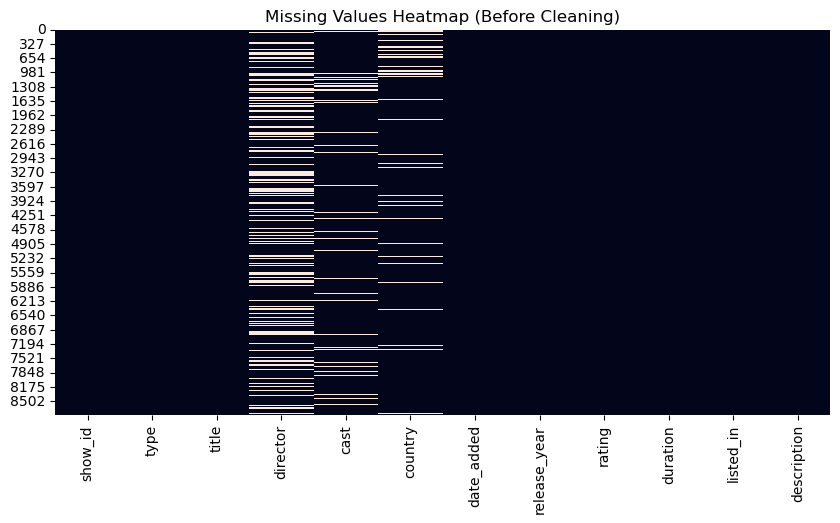

In [5]:
plt.figure(figsize=(10,5))
sns.heatmap(df.isna(), cbar=False)
plt.title("Missing Values Heatmap (Before Cleaning)")
plt.show()

The concentration of missingness in `director` and `cast` suggests this information was often unavailable at ingestion rather than lost later. Thus, treating them as `Unknown` preserves dataset fidelity.

#####
#### Duplicates

Duplicate rows can bias summary statistics and visualizations. We check if any duplicate entries exist.

In [6]:
duplicate_count = df.duplicated().sum()
print(f"Total duplicate rows: {duplicate_count}")

Total duplicate rows: 0


As there are no duplicate rows, **no further action is required** for duplicates.

#####
#### Descriptive Statistics (Numeric Features)

Summary statistics provide insight into the distribution of numeric features and help identify outliers.

In [7]:
df[['release_year']].describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


- `release_year` ranges from 1925 to 2021.
- Very old entries (e.g., 1920s–1940s) likely represent *restored classics* but are statistical outliers.

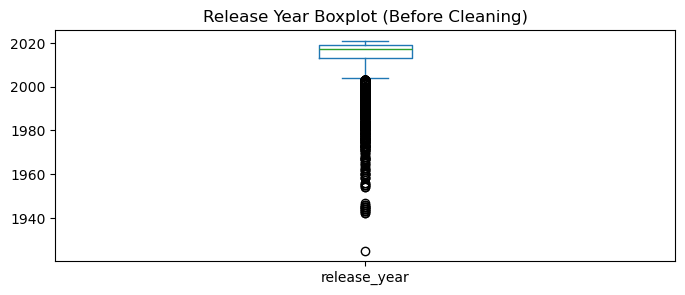

In [8]:
df['release_year'].plot(kind="box", figsize=(8,3))
plt.title("Release Year Boxplot (Before Cleaning)")
plt.show()

- Boxplot shows heavy left-skew due to historical outliers (1920s–40s).
- Median clustered around 2015–2018, consistent with Netflix’s recent content expansion.

#####
#### Duration Anomalies

The `duration` feature is particularly tricky because it contains both movies and TV shows. Let’s investigate inconsistencies.

In [9]:
df['duration'].value_counts().head(20)

duration
1 Season     1793
2 Seasons     425
3 Seasons     199
90 min        152
97 min        146
94 min        146
93 min        146
91 min        144
95 min        137
96 min        130
92 min        129
102 min       122
98 min        120
99 min        118
88 min        116
101 min       116
103 min       114
106 min       111
100 min       108
89 min        106
Name: count, dtype: int64

- Contains both formats: `"93 min"` (movies) and `"3 Seasons"` (TV shows).
- Some durations are misplaced in the `rating` column (e.g., `"74 min"`).


This heterogeneity arises because movies and TV shows share the same schema. We will normalize them separately during preprocessing.


**Reflection**:
The mixed formatting and misplacements make `duration` unusable in raw form. We will later convert it to numeric floats (minutes for movies, seasons for TV) and reassign misplaced values.

#####
#### Rating Inconsistencies

Netflix ratings come from multiple systems and sometimes contain errors. Detecting these early is crucial for reliable analysis.

In [10]:
df['rating'].value_counts().head(15)

rating
TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
Name: count, dtype: int64

- Inconsistent categories: `"TV-MA"`, `"PG-13"`, `"UR"`, `"TV-Y7-FV"`, and even durations like `"74 min"`.
- Duplicates across systems (`"UR"` vs `"NR"`, `"G"` vs `"TV-G"`).

The coexistence of MPAA (`PG-13`, `R`), TV Parental Guidelines (`TV-MA`, `TV-Y7`), and malformed entries (`66 min`) highlights schema drift. Without normalization, cross-type analysis (movies vs. TV shows) would be misleading.

**Reflection**:
This prevents meaningful aggregation. Later, `ratings` will be standardized into an ordered categorical scale spanning from child-friendly to adult-only.

#####
#### Country Entries

Some titles are produced in multiple countries. Understanding this helps us handle multi-valued categorical data correctly.

In [11]:
df['country'].sample(5)

6570    United Kingdom, United States
2434                            Egypt
2825                    United States
5218                      New Zealand
2576                    United States
Name: country, dtype: object

In [12]:
print(round(df['country'].str.contains(",").mean()*100,2))

16.55


- ≈ 15% of entries involve co-productions (multiple countries). This motivates splitting into lists rather than forcing a single country per row.
- `"Unknown"` values are also common.

**Reflection**:
This prevents direct grouping or counting. We will later split these into lists while preserving `"Unknown"`.

#####
#### Listed_in

Titles are often tagged with multiple genres. Exploring these will inform how we preprocess the data for multi-label analysis.

In [13]:
df['listed_in'].sample(5)

6053    Children & Family Movies, Dramas, Romantic Movies
4186                         Dramas, International Movies
210                   Horror Movies, International Movies
2219                      Documentaries, Music & Musicals
3257    International TV Shows, Romantic TV Shows, TV ...
Name: listed_in, dtype: object

In [14]:
print(round(df['listed_in'].str.contains(",").mean(),2))

0.77


- The majority of titles are tagged with 2–3 genres. Keeping them as lists will allow multi-label analysis (e.g., how often “Comedies” co-occur with “Romance”).
- Values are long comma-separated strings, e.g.: `"Dramas, International Movies, Independent Movies"`.


**Reflection**:
This makes genre analysis difficult. We will rename this column to `genres` and split values into lists.

#####
#### Histograms (Key Variables)

Finally, we visualize key variables to get a sense of distributions, trends, and potential anomalies before cleaning.

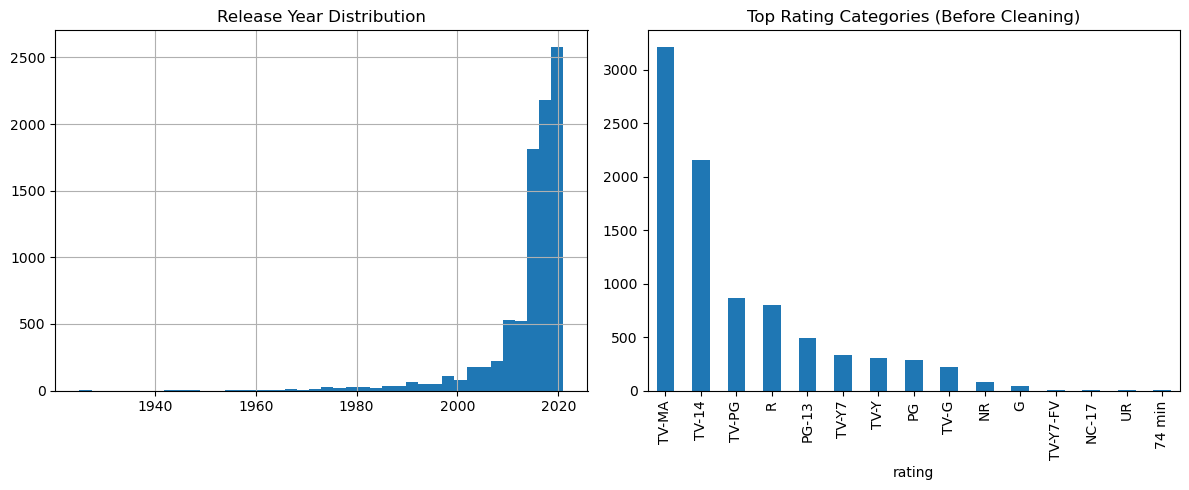

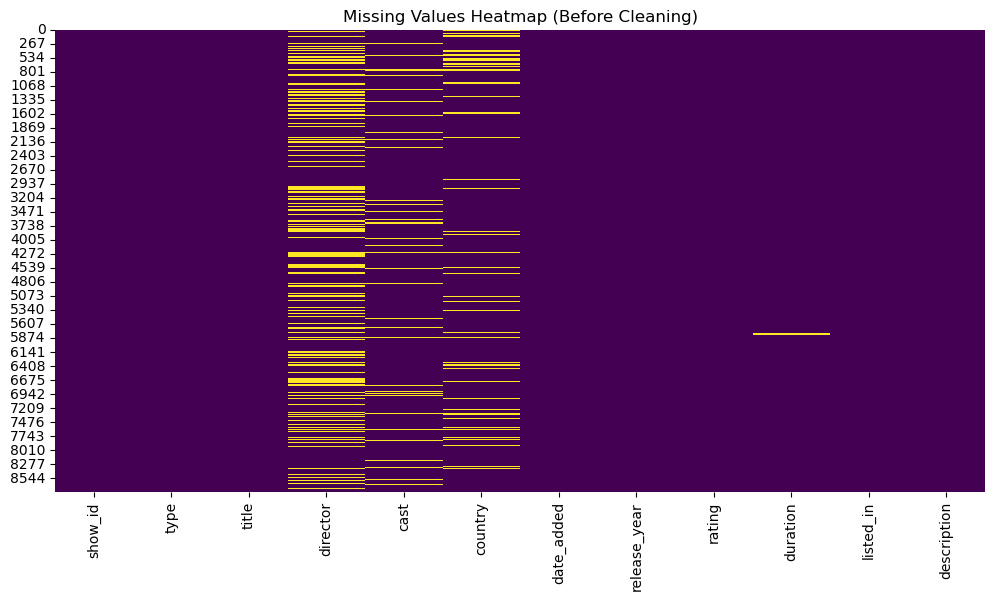

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(12,5))

df['release_year'].hist(ax=axes[0], bins=40)
axes[0].set_title("Release Year Distribution")

df['rating'].value_counts().head(15).plot(kind='bar', ax=axes[1])
axes[1].set_title("Top Rating Categories (Before Cleaning)")

plt.tight_layout()
plt.show()

plt.figure(figsize=(12,6))
sns.heatmap(df.isna(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap (Before Cleaning)")
plt.show()

The column `date_added` is still stored as a string, so its temporal distribution cannot yet be visualized.

This will be corrected when we convert it to datetime during preprocessing.

#####
#### Summary of key issues
- Significant missingness in `director`, moderate missingness in `cast` and `country`.
- Inconsistent rating systems + misplaced durations.
- Mixed `duration` formats and misplacements.
- Multi-valued text fields (`country`, `listed_in`) not yet usable for grouping.
- Outliers in `release_year` (1920s–40s).
- `date_added` not yet in datetime format.

These issues will be systematically addressed in the Data Cleaning & Preprocessing section.

###

### 2.2. Data Cleaning & Preprocessing

#### 2.2.1. Handle Missing Values & Convert Types

We start by handling missing values. Features such as `director`, `cast`, and `country` have missing entries. Imputing them with guesses could introduce bias, so we fill them with `Unknown`. Retaining `Unknown` also preserves the fact that data was missing, which can be insightful later.

In [16]:
df['director'] = df['director'].fillna('Unknown')
df['cast'] = df['cast'].fillna('Unknown')
df['country'] = df['country'].fillna('Unknown')

display(df.isna().sum()[df.isna().sum()!=0])

date_added    10
rating         4
duration       3
dtype: int64

Next, we handle `date_added`, `rating`, and `duration`. Converting these features to the correct types ensures easier analysis and reliable handling of values.

In [17]:
df['date_added'] = df['date_added'].astype(str).str.strip()
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['release_year'] = df['release_year'].astype(int)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      8807 non-null   object        
 4   cast          8807 non-null   object        
 5   country       8807 non-null   object        
 6   date_added    8797 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8803 non-null   object        
 9   duration      8804 non-null   object        
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 825.8+ KB


##### Splitting Dataset by Type 
Some features behave differently for TV Shows and Movies, so we **split the dataset** into two separate DataFrames. This allows us to handle missing values, data quality, and feature-specific transformations more effectively.

In [18]:
tv_series_df = df[df['type']=="TV Show"].copy()
movies_df = df[df['type']=="Movie"].copy()

print("TV Series Dataframe:")
display(tv_series_df.head())

print("\n\n\n\nMovies Dataframe:")
display(movies_df.head())

print("TV series missing values:")
print(tv_series_df.isna().sum()[tv_series_df.isna().sum()!=0])

print("\nMovies missing values:")
print(movies_df.isna().sum()[movies_df.isna().sum()!=0])

TV Series Dataframe:


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",Unknown,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...






Movies Dataframe:


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",Unknown,2021-09-24,2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic",2021-09-23,2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...


TV series missing values:
date_added    10
rating         2
dtype: int64

Movies missing values:
rating      2
duration    3
dtype: int64


##### Handling TV Series Dataframe Missing Values

We'll start by handling missing data for TV Series.

For the date_added column, some values are missing or inconsistent.

- First, we sort by release_year to maintain chronological order.
- Then, we interpolate missing dates linearly.
- This may create some “impossible” dates (where date_added < release_year), which we handle in the next step.

In [19]:
tv_series_df=tv_series_df.sort_values(by='release_year')

tv_series_df['date_added_temp']=tv_series_df['date_added'].map(lambda x: x.timestamp() if pd.notna(x) else np.nan)
tv_series_df['date_added_temp']=tv_series_df['date_added_temp'].interpolate(method='linear')

tv_series_df['date_added'] = pd.to_datetime(tv_series_df['date_added_temp'], unit='s')
tv_series_df['date_added'] = tv_series_df['date_added'].dt.strftime('%Y-%m-%d')
tv_series_df = tv_series_df.drop(columns='date_added_temp')

After ensuring that `date_added` is properly handled, we address missing values in the `rating` column.

Approach chosen:
- Fill missing values with a random valid rating from the dataset.
- This preserves the overall distribution of ratings without biasing toward a single value.
- A random seed is set to ensure reproducibility.
- Since only a small fraction of rows have missing ratings, this approach is appropriate and avoids overcomplicating the pipeline.

In [20]:
choices = tv_series_df['rating'].dropna().unique().tolist()
np.random.seed(42)
tv_series_df['rating'] = tv_series_df['rating'].apply(
    lambda x: np.random.choice(choices) if pd.isna(x) else x
)
print(tv_series_df.isna().sum()[tv_series_df.isna().sum()!=0])

Series([], dtype: int64)


We have successfully handled all missing values and prepared the TV Series dataset for further analysis. Next, we apply similar preprocessing steps to the Movies dataset.

##### Handling Movies Dataframe Missing Values

We now handle missing values in the **Movies dataset**, starting with the `rating` column.
- Missing ratings are filled with a **random selection from existing ratings**, consistent with how we handled TV Shows.
- This preserves the original distribution and avoids biasing toward a single rating.
- A random seed is set to ensure reproducibility.

In [21]:
choices = movies_df['rating'].dropna().unique().tolist()
np.random.seed(42)
movies_df['rating'] = movies_df['rating'].apply(
    lambda x: np.random.choice(choices) if pd.isna(x) else x
)
print(movies_df.isna().sum()[movies_df.isna().sum()!=0])

duration    3
dtype: int64


Next, we handle missing values in the `duration` column.

- The `duration` column currently contains strings like "90 min".
- We remove the *" min"* suffix, convert to numeric, and fill missing values with the **median**.
- Median is preferred over mean because it is robust to outliers in movie lengths.

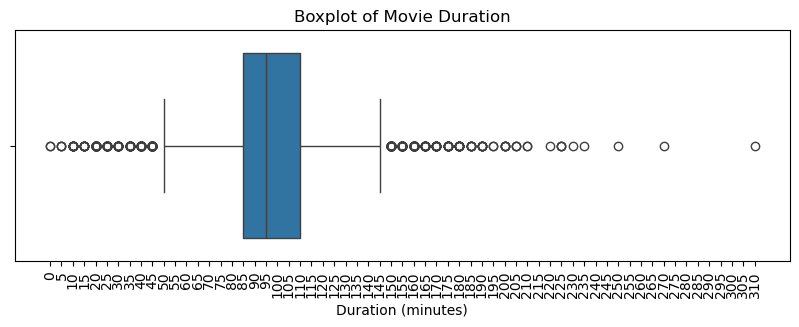

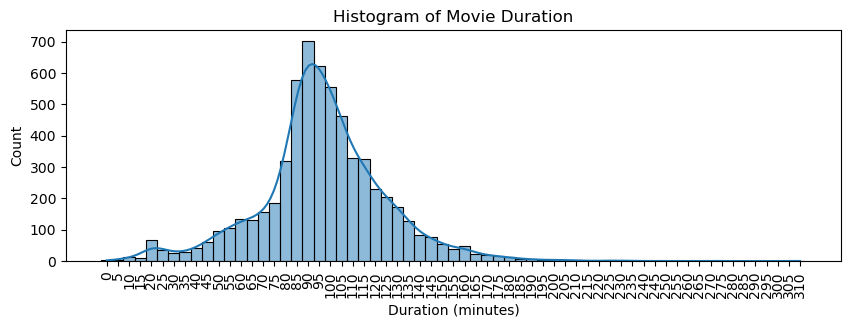

In [22]:
movies_df['duration'] = movies_df['duration'].str.replace(' min', '', regex=False)
movies_df['duration'] = pd.to_numeric(movies_df['duration'], errors='coerce')

bins = range(0, int(movies_df['duration'].max()) + 5, 5)
labels = [f"{b}" for b in bins[:-1]]

movies_df['duration_bin'] = pd.cut(movies_df['duration'], bins=bins, labels=labels, include_lowest=True)

plt.figure(figsize=(10, 3))
sns.boxplot(x=movies_df['duration_bin'])
plt.title("Boxplot of Movie Duration")
plt.xlabel("Duration (minutes)")
plt.xticks(rotation=90, ha='center')

plt.show()

plt.figure(figsize=(10, 3))
sns.histplot(movies_df['duration_bin'], bins=30, kde=True)
plt.title("Histogram of Movie Duration")
plt.xlabel("Duration (minutes)")
plt.ylabel("Count")
plt.xticks(rotation=90, ha='center')
plt.show()

movies_df = movies_df.drop(columns='duration_bin')

In [23]:
display(movies_df[['title', 'duration']].head())

,title,duration
0,Dick Johnson Is Dead,90.0
6,My Little Pony: A New Generation,91.0
7,Sankofa,125.0
9,The Starling,104.0
12,Je Suis Karl,127.0


In [24]:
median_duration = movies_df['duration'].median()
movies_df['duration']=movies_df['duration'].fillna(median_duration)

print(movies_df.isna().sum()[movies_df.isna().sum()!=0])

Series([], dtype: int64)


####
#### 2.2.2. Ensure Data Quality
In this section, we ensure that the dataset does not contain impossible or erroneous values. Data quality checks are essential before performing exploratory data analysis (EDA), as they guarantee that insights are not biased by invalid records.


#####  Date Added vs Release Data
No TV show or movie should have a `date_added` earlier than its official `release_year`. Such cases indicate data inconsistencies that must be corrected.

In [25]:
tv_series_df['date_added'] = pd.to_datetime(tv_series_df['date_added'], errors='coerce')
print(f"Number of rows with date_added before release_year in tv shows dataset: {len(tv_series_df[tv_series_df['date_added'].dt.year<tv_series_df['release_year']])}")

movies_df['date_added'] = pd.to_datetime(movies_df['date_added'], errors='coerce')
print(f"Number of rows with date_added before release_year in movie dataset: {len(movies_df[movies_df['date_added'].dt.year<movies_df['release_year']])}")

Number of rows with date_added before release_year in tv shows dataset: 12
Number of rows with date_added before release_year in movie dataset: 2


As we see we have 12 rows with impossible data in the TV Shows dataset and 2 rows with impossible data in the Movies dataset. Such cases are corrected by setting the year of `date_added` equal to `release_year` while preserving month and day. If the day is invalid (e.g., Feb 29), we adjust to the last valid day of the month.

In [26]:
def adjust_date(row):
    if pd.notna(row['date_added']) and row['date_added'].year < row['release_year']:
        try:
            return row['date_added'].replace(year=row['release_year'])
        except ValueError:
            return datetime(row['release_year'], row['date_added'].month, min(row['date_added'].day, 28))
    return row['date_added']

tv_series_df['date_added'] = tv_series_df.apply(adjust_date, axis=1)
movies_df['date_added'] = movies_df.apply(adjust_date, axis=1)

In [27]:
print(f"Number of rows with date_added before release_year: {len(tv_series_df[tv_series_df['date_added'].dt.year<tv_series_df['release_year']])}")
print(f"Number of rows with date_added before release_year: {len(movies_df[movies_df['date_added'].dt.year<movies_df['release_year']])}")

Number of rows with date_added before release_year: 0
Number of rows with date_added before release_year: 0


After correction, there are 0 rows with `date_added` earlier than `release_year`, confirming data consistency for subsequent analysis.

######
##### Netflix Foundation Year
Netflix was founded in 1997, and streaming content was introduced around 2007. 

Any date_added prior to 1997 would be invalid, as Netflix did not exist. Streaming started around 2007, so dates earlier than this are also unlikely.

In [28]:
print(tv_series_df.sort_values(by="date_added")['date_added'])
print(movies_df.sort_values(by="date_added")['date_added'])

6611   2008-02-04
5940   2013-08-02
5939   2013-09-01
6885   2013-10-08
7908   2013-10-14
          ...    
3      2021-09-24
4      2021-09-24
1      2021-09-24
1696   2021-11-15
1551   2021-12-14
Name: date_added, Length: 2676, dtype: datetime64[ns]
5957   2008-01-01
5956   2009-05-05
5955   2009-11-18
7370   2010-11-01
5954   2011-05-17
          ...    
12     2021-09-23
7      2021-09-24
6      2021-09-24
9      2021-09-24
0      2021-09-25
Name: date_added, Length: 6131, dtype: datetime64[ns]


As we can see the first TV show was added in 2008 which means that all the data is correct. This means that the `date_added` column is already handled.

######
##### Duplicate Entries
We previously ensured that there are no duplicate rows but we must make sure that that there are not two rows with the same `title`, `type` and `release_year`, ensuring uniqueness.

Ensuring uniqueness by title, type, and release_year prevents counting the same content twice in analyses or aggregations. This check ensures that aggregated metrics (e.g., counts per year, ratings) are not biased by repeated entries

In [29]:
duplicates_tv = tv_series_df[tv_series_df.duplicated(subset=['title', 'type', 'release_year'], keep=False)]
duplicates_movies = movies_df[movies_df.duplicated(subset=['title', 'type', 'release_year'], keep=False)]

display(duplicates_tv)
display(duplicates_movies)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


As we can see there are no duplicate values so no actions need to be taken.

######
##### Impossible Durations
Movie durations must be positive values, as 0 or negative durations are impossible and would distort statistical analyses such as mean or median duration.

In [30]:
display(movies_df[(movies_df['duration']<=0)])

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


In [31]:
tv_series_df['duration'] = tv_series_df['duration'].str.replace(r' Seasons?$', '', regex=True)
display(tv_series_df['duration'].sort_values())

4250    1
3944    1
3940    1
3938    1
4227    1
       ..
67      9
1998    9
3541    9
8       9
1480    9
Name: duration, Length: 2676, dtype: object

No movies with zero or negative duration were found. TV series durations have been standardized by removing the ‘Season(s)’ suffix.

######
##### Summary of Data Quality Checks

| Check | TV Shows Issues | Movies Issues | Action Taken |
|----------|----------|----------|----------|
| Date Added vs Release Year | 12 | 2 | Adjusted `date_added` to `release_year` |
| Netflix Foundation Year | 0 | 0 | None |
| Duplicate Entries | 0 | 0 | None |
| Impossible Durations | 0 | 0 | None |

####
#### 2.2.3. Standardize Categories
The dataset contains several categorical features (e.g., `rating`, `type`, `genres`, `country`) that are inconsistent, duplicated, or stored in formats that make analysis difficult.  
Standardizing these categories is essential to:  
- **Ensure consistency** across movies and TV series.  
- **Correct misplaced values** (e.g., durations stored as ratings).  
- **Unify equivalent labels** from different systems (e.g., MPAA vs. TV ratings).  
- **Enable meaningful comparisons and visualizations** by using consistent, ordered categories.  

In the following subsections, we will address each categorical feature one by one, starting with `rating`.


##### **Normalize `Rating`**

The `rating` column contains different audience suitability classifications, but they are not standardized across entries.  
For example:  
- Some values like `"66 min"`, `"74 min"`, and `"84 min"` appear under `rating`, but these are actually **durations** and were misplaced.  
- Other values come from **different rating systems** (MPAA for movies, TV parental guidelines for series).  
- There are also redundant or inconsistent categories (`"TV-Y7"` vs `"TV-Y7-FV"`, `"UR"` vs `"NR"`, `"G"` vs `"TV-G"`, etc.).

To ensure consistency and comparability, we performed the following steps:

1. **Correct mislabeled durations**  
   - Reassigned `"66 min"`, `"74 min"`, and `"84 min"` from `rating` into the `duration` column.  
   - After correction, their `rating` values were set to `"NR"` (*Not Rated*).

2. **Unify similar or duplicate ratings**  
   - `"UR"` → `"NR"`  
   - `"TV-Y7"` and `"TV-Y7-FV"` → `"M7"` (*suitable for 7+*)  
   - `"TV-14"` → `"M14"`  
   - `"TV-G"` and `"G"` → `"General"`  
   - `"TV-Y"` → `"Young"`  
   - `"PG-13"` → `"M13"`  
   - `"TV-MA"`, `"NC-17"`, and `"R"` → `"Adult"`  
   - `"TV-PG"` → `"PG"`

3. **Define an ordered categorical scale**  
   To make ratings meaningful for analysis and visualization, we introduced an **ordered scale**:  


In [32]:
print(movies_df['rating'].unique().tolist())
print(tv_series_df['rating'].unique().tolist())

['PG-13', 'PG', 'TV-MA', 'TV-PG', 'TV-14', 'TV-Y', 'R', 'TV-G', 'TV-Y7', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR', 'TV-Y7-FV', 'UR']
['TV-14', 'TV-MA', 'TV-G', 'TV-PG', 'TV-Y7', 'TV-Y', 'NR', 'TV-Y7-FV', 'R']


In [33]:
movies_df.loc[movies_df['rating'] == '66 min', 'duration'] = 66
movies_df.loc[movies_df['rating']=='84 min', 'duration'] = 88
movies_df.loc[movies_df['rating']=='74 min', 'duration'] = 74

movies_df.loc[movies_df['rating'] == '66 min', 'rating'] = 'NR'
movies_df.loc[movies_df['rating']=='84 min', 'rating'] = 'NR'
movies_df.loc[movies_df['rating']=='74 min', 'rating'] = 'NR'

# UR -> NR
movies_df.loc[movies_df['rating']=='UR', 'rating'] = 'NR'

# TV-Y7 and TV-Y7-FV -> M7
movies_df.loc[movies_df['rating']=='TV-Y7', 'rating'] = 'M7'
movies_df.loc[movies_df['rating']=='TV-Y7-FV', 'rating'] = 'M7'

tv_series_df.loc[tv_series_df['rating']=='TV-Y7', 'rating'] = 'M7'
tv_series_df.loc[tv_series_df['rating']=='TV-Y7-FV', 'rating'] = 'M7'

# TV-14 -> M14
movies_df.loc[movies_df['rating']=='TV-14', 'rating'] = 'M14'
tv_series_df.loc[tv_series_df['rating']=='TV-14', 'rating'] = 'M14'

# TV-G -> G
movies_df.loc[movies_df['rating']=='TV-G', 'rating'] = 'General'
movies_df.loc[movies_df['rating']=='G', 'rating'] = 'General'
tv_series_df.loc[tv_series_df['rating']=='TV-G', 'rating'] = 'General'

# TV-Y -> Y
movies_df.loc[movies_df['rating']=='TV-Y', 'rating'] = 'Young'
tv_series_df.loc[tv_series_df['rating']=='TV-Y', 'rating'] = 'Young'

# PG-13 -> M13
movies_df.loc[movies_df['rating']=='PG-13', 'rating'] = 'M13'

# TV-MA, NC-17 and R -> A
movies_df.loc[movies_df['rating']=='TV-MA', 'rating'] = 'Adult'
movies_df.loc[movies_df['rating']=='NC-17', 'rating'] = 'Adult'
movies_df.loc[movies_df['rating']=='R', 'rating'] = 'Adult'

tv_series_df.loc[tv_series_df['rating']=='R', 'rating'] = 'Adult'
tv_series_df.loc[tv_series_df['rating']=='TV-MA', 'rating'] = 'Adult'

# TV-PG -> PG
movies_df.loc[movies_df['rating']=='TV-PG', 'rating'] = 'PG'
tv_series_df.loc[tv_series_df['rating']=='TV-PG', 'rating'] = 'PG'

In [34]:
print(movies_df['rating'].unique().tolist())
print(tv_series_df['rating'].unique().tolist())

['M13', 'PG', 'Adult', 'M14', 'Young', 'General', 'M7', 'NR']
['M14', 'Adult', 'General', 'PG', 'M7', 'Young', 'NR']


In [35]:
rating_order = ['Young', 'M7', 'M13', 'M14', 'PG', 'General', 'Adult', 'NR']

movies_df['rating'] = pd.Categorical(movies_df['rating'], categories=rating_order, ordered=True)
tv_series_df['rating'] = pd.Categorical(tv_series_df['rating'], categories=rating_order, ordered=True)

- This order represents the **progression of maturity levels**: from content for young audiences → general audiences → adult-only → unrated.  
- Both `movies_df` and `tv_series_df` now use this standardized and ordered categorical type.

This normalization ensures that:
- Ratings are **consistent across movies and TV series**.  
- They can be used for **comparative analysis** and **grouped visualizations**.  
- Misplaced values no longer pollute the `rating` field.  


#####
##### **Standardize `type` and `duration`**

Both the `type` and `duration` columns contained inconsistencies that needed to be addressed before analysis.

1. **Standardize `type`**  
   - The `type` column distinguishes between movies and TV shows.  
   - To enforce consistency and prevent typos/duplicates, we converted it into a **categorical variable** with only two valid values: `"Movie"` and `"TV Show"`.  
   - This ensures uniform grouping and makes it easier to filter and aggregate by content type.

In [36]:
movies_df['type'] = pd.Categorical(movies_df['type'], categories=['Movie', 'TV Show'])
tv_series_df['type'] = pd.Categorical(tv_series_df['type'], categories=['Movie', 'TV Show'])

2. **Standardize `duration`**
    - The `duration` field was stored in mixed formats (strings and numbers), which limited numerical analysis.
    - We explicitly cast it to float, ensuring compatibility with operations like averages, distributions, and visualizations.
    - Any misplaced duration values (originally found in `rating`) were already corrected in the previous step.

######
⚠️ Note: The meaning of `duration` differs between content types.  
- For **Movies**, it represents the runtime in minutes.  
- For **TV Shows**, it represents the number of seasons (or episodes in some cases).  

Keeping both as numeric values allows easier handling, but interpretations must always consider the content type.


In [37]:
movies_df['duration'] = movies_df['duration'].astype(float)
tv_series_df['duration'] = tv_series_df['duration'].astype(float)

3. **Validation:**
    - After these transformations, we inspected the data types to confirm correctness:

In [38]:
print(movies_df.info())
print(tv_series_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 6131 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       6131 non-null   object        
 1   type          6131 non-null   category      
 2   title         6131 non-null   object        
 3   director      6131 non-null   object        
 4   cast          6131 non-null   object        
 5   country       6131 non-null   object        
 6   date_added    6131 non-null   datetime64[ns]
 7   release_year  6131 non-null   int64         
 8   rating        6131 non-null   category      
 9   duration      6131 non-null   float64       
 10  listed_in     6131 non-null   object        
 11  description   6131 non-null   object        
dtypes: category(2), datetime64[ns](1), float64(1), int64(1), object(7)
memory usage: 539.3+ KB
None
<class 'pandas.core.frame.DataFrame'>
Index: 2676 entries, 4250 to 11
Data columns (total 12 colu

- `type` → Categorical (`Movie` / `TV Show`)
- `duration` → Float (minutes for movies, episodes count for series)

This ensures both attributes are properly standardized and ready for analysis.

#####
##### Split `listed_in` into a `genres`

The `listed_in` column originally contained a **comma-separated string** describing the content categories (e.g., `"Comedies, Dramas, International Movies"`).
For analysis, it is more useful to work with these categories as a list of individual genres rather than a single string.

1. **Rename column for clarity:**
    - We renamed `listed_in` to `genres` to better reflect its meaning.

In [39]:
movies_df.rename(columns={'listed_in': 'genres'}, inplace=True)
tv_series_df.rename(columns={'listed_in': 'genres'}, inplace=True)

2. **Convert comma-separated strings into lists:**
    - Each entry was split by commas.
    - Leading/trailing spaces were stripped to ensure clean values.
    - The result is a Python list of genres for each row.

In [40]:
movies_df['genres'] = movies_df['genres'].apply(lambda x: [genre.strip() for genre in x.split(',')])
tv_series_df['genres'] = tv_series_df['genres'].apply(lambda x: [genre.strip() for genre in x.split(',')])

3. **Validation:**
    - We inspected the structure to confirm the transformation:

In [41]:
display(movies_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 6131 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       6131 non-null   object        
 1   type          6131 non-null   category      
 2   title         6131 non-null   object        
 3   director      6131 non-null   object        
 4   cast          6131 non-null   object        
 5   country       6131 non-null   object        
 6   date_added    6131 non-null   datetime64[ns]
 7   release_year  6131 non-null   int64         
 8   rating        6131 non-null   category      
 9   duration      6131 non-null   float64       
 10  genres        6131 non-null   object        
 11  description   6131 non-null   object        
dtypes: category(2), datetime64[ns](1), float64(1), int64(1), object(7)
memory usage: 539.3+ KB


None

Now, `genres` is stored as a list of categories, enabling operations like:
- Counting the number of genres per title.
- Exploding the list for frequency analysis.
- Grouping by specific genres across movies and TV shows.

#####
##### Country standardization

The country `column` contains the country or countries associated with each title.
Currently, it is stored as a comma-separated string, and some entries are `"Unknown"`.

To facilitate analysis and maintain consistency, we standardized the `country` field as follows:
1. **Split multiple countries into a list**
    - Each entry with multiple countries is split by commas.
    - Leading/trailing spaces are removed to clean the values.
    - `"Unknown"` entries are preserved as a single-item list.

In [42]:
def split_countries(x):
    if x == 'Unknown':
        return ['Unknown']
    else:
        return [country.strip() for country in x.split(',')]

movies_df['country'] = movies_df['country'].apply(split_countries)
tv_series_df['country'] = tv_series_df['country'].apply(split_countries)

2. **Validation**

    - After the transformation, each row contains a list of countries, even if there is only one country.
    - `"Unknown"` is still clearly identifiable, allowing you to filter or handle missing geographic information.


This standardization enables:
- Counting the number of countries per title.
- Grouping or filtering by specific countries.
- Future canonicalization or mapping to ISO country codes if needed.

####
#### 2.2.4. Feature Engineering

Feature engineering allows us to create **new variables** that can provide additional insights during analysis. Based on the current dataset, we derived several features from existing columns.

1. **Extract `added_year` and `added_month` from `date_added`**
    - These features capture the **year and month a title was added** to the platform.
    - They can be useful for trend analysis, e.g., identifying seasonal patterns in content additions.

In [43]:
movies_df['added_year'] = movies_df['date_added'].dt.year
movies_df['added_month'] = movies_df['date_added'].dt.month
tv_series_df['added_year'] = tv_series_df['date_added'].dt.year
tv_series_df['added_month'] = tv_series_df['date_added'].dt.month

2. **Number of genres per title (`num_genres`)**
    - Counts how many genres each title belongs to
    - Useful to explore if multi-genre titles differ in popularity or content characteristics

In [44]:
movies_df['num_genres'] = movies_df['genres'].apply(len)
tv_series_df['num_genres'] = tv_series_df['genres'].apply(len)

3. **Number of countries per title (`num_countries`)**
    - Indicates how many countries are associated with a title
    - Useful for analyzing international content distribution

In [45]:
movies_df['num_countries'] = movies_df['country'].apply(len)
tv_series_df['num_countries'] = tv_series_df['country'].apply(len)

4. **Title Length and number of words**
    - `title_length` measures the number of characters in the title
    - `title_words` counts the number of words
    - These features can help detect trends in title naming and evolution of marketing strategies 

In [46]:
movies_df['title_length'] = movies_df['title'].str.len()
tv_series_df['title_length'] = tv_series_df['title'].str.len()

movies_df['title_words'] = movies_df['title'].str.split().str.len()
tv_series_df['title_words'] = tv_series_df['title'].str.split().str.len()

5. **Number of actors (`num_actors`)**
    - Counts the number of actors listed in the `cast` column
    - `"Unknown"` or empty casts are counted as 0
    - This can help explore relationships between cast size and other variables such as genre, rating or popularity

In [47]:
def count_actors(cast):
    if cast.strip().lower() == "unknown" or cast.strip() == "":
        return 0
    return len([actor.strip() for actor in cast.split(",") if actor.strip() != ""])

movies_df['num_actors'] = movies_df['cast'].apply(count_actors)
tv_series_df['num_actors'] = tv_series_df['cast'].apply(count_actors)


6. **Validation:**
    - Display the updated dataframes to confirm new features were added correctly:

In [48]:
display(movies_df.head())
display(tv_series_df.head())

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genres,description,added_year,added_month,num_genres,num_countries,title_length,title_words,num_actors
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,[United States],2021-09-25,2020,M13,90.0,[Documentaries],"As her father nears the end of his life, filmm...",2021,9,1,1,20,4,0
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",[Unknown],2021-09-24,2021,PG,91.0,[Children & Family Movies],Equestria's divided. But a bright-eyed hero be...,2021,9,1,1,32,6,10
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","[United States, Ghana, Burkina Faso, United Ki...",2021-09-24,1993,Adult,125.0,"[Dramas, Independent Movies, International Mov...","On a photo shoot in Ghana, an American model s...",2021,9,3,6,7,1,8
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",[United States],2021-09-24,2021,M13,104.0,"[Comedies, Dramas]",A woman adjusting to life after a loss contend...,2021,9,2,1,12,2,11
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","[Germany, Czech Republic]",2021-09-23,2021,Adult,127.0,"[Dramas, International Movies]",After most of her family is murdered in a terr...,2021,9,2,2,12,3,11


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genres,description,added_year,added_month,num_genres,num_countries,title_length,title_words,num_actors
4250,s4251,TV Show,Pioneers: First Women Filmmakers*,Unknown,Unknown,[Unknown],2018-12-30,1925,M14,1.0,[TV Shows],This collection restores films from women who ...,2018,12,1,1,33,4,0
1331,s1332,TV Show,Five Came Back: The Reference Films,Unknown,Unknown,[United States],2021-02-09,1945,Adult,1.0,[TV Shows],This collection includes 12 World War II-era p...,2021,2,1,1,35,6,0
7743,s7744,TV Show,Pioneers of African-American Cinema,"Oscar Micheaux, Spencer Williams, Richard E. N...",Unknown,[United States],2017-02-01,1946,M14,1.0,[TV Shows],This newly preserved collection features more ...,2017,2,1,1,35,4,0
8541,s8542,TV Show,The Twilight Zone (Original Series),Unknown,Rod Serling,[United States],2017-07-01,1963,M14,4.0,"[Classic & Cult TV, TV Sci-Fi & Fantasy]","Hosted by creator Rod Serling, this groundbrea...",2017,7,2,1,35,5,1
8189,s8190,TV Show,The Andy Griffith Show,Unknown,"Andy Griffith, Ron Howard, Don Knotts, Frances...",[United States],2017-07-01,1967,General,8.0,"[Classic & Cult TV, TV Comedies]",Homespun humor and easygoing Sheriff Andy Tayl...,2017,7,2,1,22,4,6


With these engineered features, the dataset is now enriched and ready for deeper exploratory analysis, such as:
- Investigating correlations between number of genres, actors, or countries and other variables like `rating` or `duration`.
- Visualizing trends over the years based on `added_year` or `added_month`.
- Comparing characteristics of titles by type (`Movie` vs `TV Show`).

## 2.3. Conclusions